# Let's setup the environment by importing required libraries.

In [3]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans

from bs4 import BeautifulSoup
import csv

!pip install geocoder
import geocoder # to get longitude and latitude

!conda install -c conda-forge folium
import folium # Map plotting library
import numpy as np
from pandas.io.json import json_normalize # Tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

     |████████████████████████████████| 98 kB 9.2 MB/s  eta 0:00:01
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.9

  added / updated specs:
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.2               |     pyhd8ed1ab_0          26 KB  conda-forge
    folium-0.12.1.post1        |     pyhd8ed1ab_1          64 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          90 KB

The following NEW packages will be INSTALLED:

  branca             conda-forge/noarch::branca-0.4.2-pyhd8ed1ab_0
  folium             conda-forge/noarch::folium-0.12.1.post1-pyhd8ed1ab_1



folium-0.12.1.post1  | 64 KB     | ##################################### | 100% 
branca-0.4.2      

In [4]:
source = requests.get('https://en.wikipedia.org/wiki/Category:Districts_of_Bucharest').text 
soup = BeautifulSoup(source, 'lxml')

In [14]:
csv_file = open('bucharest.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Districts'])

11

In [15]:
mwcg = soup.find_all(class_ = "mw-category-group")

length = len(mwcg) # Gets the length of number of `mw-category-groups` present

for i in range(1, length):  # Gets all the districts
    lists = mwcg [i].find_all('a')
    for list in lists:
        nbd = list.get('title') # Gets the title of the district
        csv_writer.writerow([nbd]) # Writes the name of the district in the csv file

In [16]:
csv_file.close()

In [22]:
bucharest_raw = pd.read_csv('bucharest.csv')

In [23]:
bucharest_raw.shape

(41, 1)

In [25]:
bucharest_raw['Districts'][0]="Lipscani"
bucharest_raw

,Districts
0,Lipscani
1,Aviației
2,Băneasa
3,"Berceni, Bucharest"
4,Bucureștii Noi
5,Centrul Civic
6,"Colentina, Bucharest"
7,Cotroceni
8,Crângași
9,Dămăroaia


In [26]:
# Initialize varialbes
lat = []
lng = []
lat_lng_coords = None

# Get postcodes from districts table
districts = bucharest_raw['Districts']

# Store latitude and longitude values in lat and lng
for ds in districts:
    g = geocoder.arcgis('{}, Bucharest, RO'.format(ds))
    lat_lng_coords = g.latlng
    lat.append(lat_lng_coords[0])
    lng.append(lat_lng_coords[1])

In [27]:
buc_data=bucharest_raw
buc_data['Latitude']=lat
buc_data['Longitude']=lng

In [28]:
buc_data.head()

,Districts,Latitude,Longitude
0,Lipscani,44.432163,26.104486
1,Aviației,44.481430,26.100141
2,Băneasa,44.490610,26.076860
3,"Berceni, Bucharest",44.386200,26.128960
4,Bucureștii Noi,44.489073,26.035983


# Let's setup FourSquare credentials.

In [29]:
CLIENT_ID = 'JW1LOUKCHOBJJGPYYZFROQZINFPN0AU4E44WNXM51NPILF3W' # your Foursquare ID
CLIENT_SECRET = 'QEEXIE4ODGP1UZVI35RD0OQL2XS2WQWE3ZNAQ3T4CMSOMZNJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JW1LOUKCHOBJJGPYYZFROQZINFPN0AU4E44WNXM51NPILF3W
CLIENT_SECRET:QEEXIE4ODGP1UZVI35RD0OQL2XS2WQWE3ZNAQ3T4CMSOMZNJ


In [30]:
from geopy.geocoders import Nominatim

address = 'Bucharest, RO'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bucharest are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bucharest are 44.4361414, 26.1027202.


# Let's plot map of Bucharest using latitude and longitude values.

In [31]:
buc_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(buc_data['Latitude'], buc_data['Longitude'], buc_data['Districts']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(buc_map)  
    
buc_map

# In the following call we will create a function which will extract the category from the FourSquare vanues. Later we will apply FourSquare API in all the districts on Bucharest.

In [32]:
# Gets the name of the category

def get_category_type(row):
    categories_list = row['Category']  
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [34]:
explore_df_list = []

for i, nhood_name in enumerate(buc_data['Districts']):  
    
    try :
        #Get districts data
        nhood_name = buc_data.loc[i, 'Districts']
        nhood_lat = buc_data.loc[i, 'Latitude']
        nhood_lng = buc_data.loc[i, 'Longitude']

        radius = 1000 
        LIMIT = 30 

        url = 'https://api.foursquare.com/v2/venues/explore?client_id={} \
        &client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, nhood_lat, nhood_lng, VERSION, radius, LIMIT)

        results = json.loads(requests.get(url).text)
        results = results['response']['groups'][0]['items']

        nearby = pd.json_normalize(results) # Flatten JSON

        # Filter the columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        nearby = nearby.loc[:, filtered_columns]

        # Rename the columns
        columns = ['Name', 'Category', 'Latitude', 'Longitude']
        nearby.columns = columns

        # Get the categories
        nearby['Category'] = nearby.apply(get_category_type, axis=1)    

        # Get the required data
        for i, name in enumerate(nearby['Name']):
            s_list = nearby.loc[i, :].values.tolist()  # Converts the numpy array to a python list
            f_list = [nhood_name, nhood_lat, nhood_lng] + s_list
            explore_df_list.append(f_list)
    
    except Exception as e:
        pass

# Now we will create a dataframe for performing clustering.

In [35]:
explore_buc = pd.DataFrame([item for item in explore_df_list])
explore_buc.columns = ['District', 'District Latitude', 'District Longitude', 'Venue Name', 'Venue Category', 'Venue Latitude', 'Venue Longitude']
explore_buc.head()

,District,District Latitude,District Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude
0,Lipscani,44.432163,26.104486,Cărturești Carusel,Bookstore,44.431918,26.101617
1,Lipscani,44.432163,26.104486,Antic ExLibris,Used Bookstore,44.433489,26.102379
2,Lipscani,44.432163,26.104486,Leonidas,Chocolate Shop,44.433488,26.102255
3,Lipscani,44.432163,26.104486,Corks,Wine Bar,44.431965,26.102692
4,Lipscani,44.432163,26.104486,Red Goblin,Toy / Game Store,44.434314,26.105523


# Now we will perform one-hot encoding to analyze districts of Bucharest.

In [38]:
buc_1hot=pd.get_dummies(explore_buc[['Venue Category']],prefix="",prefix_sep="")


# Add district column back to dataframe
buc_1hot['District'] = explore_buc['District'] 


# Move districts column to the first column
fixed_columns = [buc_1hot.columns[-1]] + buc_1hot.columns[:-1].values.tolist()
buc_1hot = buc_1hot[fixed_columns]

buc_1hot.head()

,District,Accessories Store,Airport Terminal,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Beach,Beer Bar,Beer Garden,Betting Shop,Big Box Store,Bistro,Bookstore,Boutique,Bowling Alley,Burger Joint,Bus Station,Café,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Department Store,Dessert Shop,Diner,Dog Run,Doner Restaurant,Drugstore,Eastern European Restaurant,Electronics Store,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gas Station,Gastropub,German Restaurant,Go Kart Track,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hookah Bar,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indoor Play Area,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Lebanese Restaurant,Light Rail Station,Lighting Store,Lounge,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monastery,Multiplex,Music Store,Nature Preserve,Nightclub,Opera House,Outdoor Sculpture,Outlet Mall,Palace,Park,Pedestrian Plaza,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Pool,Pool Hall,Print Shop,Pub,Recreation Center,Restaurant,Rock Club,Romanian Restaurant,Roof Deck,Rooftop Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Theater,Theme Restaurant,Toy / Game Store,Track,Train Station,Tunnel,Turkish Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Veterinarian,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop,Women's Store
0,Lipscani,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Lipscani,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Lipscani,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Lipscani,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Lipscani,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

# In the following step we will agregate the venues by districts and later we will create a function to return most common venues.

In [40]:
buc_grouped=buc_1hot.groupby('District').mean().reset_index()
buc_grouped.head()

,District,Accessories Store,Airport Terminal,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Beach,Beer Bar,Beer Garden,Betting Shop,Big Box Store,Bistro,Bookstore,Boutique,Bowling Alley,Burger Joint,Bus Station,Café,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Department Store,Dessert Shop,Diner,Dog Run,Doner Restaurant,Drugstore,Eastern European Restaurant,Electronics Store,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gas Station,Gastropub,German Restaurant,Go Kart Track,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hookah Bar,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indoor Play Area,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Lebanese Restaurant,Light Rail Station,Lighting Store,Lounge,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monastery,Multiplex,Music Store,Nature Preserve,Nightclub,Opera House,Outdoor Sculpture,Outlet Mall,Palace,Park,Pedestrian Plaza,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Pool,Pool Hall,Print Shop,Pub,Recreation Center,Restaurant,Rock Club,Romanian Restaurant,Roof Deck,Rooftop Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Theater,Theme Restaurant,Toy / Game Store,Track,Train Station,Tunnel,Turkish Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Veterinarian,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop,Women's Store
0,13 Septembrie,0.033333,0.000000,0.033333,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.033333,0.000000,0.0,0.0,0.000000,0.000000,0.033333,0.033333,0.0,0.0,0.033333,0.033333,0.0,0.000000,0.033333,0.033333,0.066667,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.00,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.033333,0.033333,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.033333,0.000000,0.0,0.0,0.0,0.0,0.066667,0.0,0.100000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.033333,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.033333,0.0,0.033333,0.0,0.033333,0.000000,0.000000,0.0,0.033333,0.0,0.033333,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,Aviației,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.033333,0.0,0.000000,0.000000,0.033333,0.0,0.0,0.033333,0.000000,0.066667,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.066667,0.000000,0.066667,0.000000,0.0,0.0,0.0,0.00,0.0,0.066667,0.0,0.00,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.033

In [41]:
def top_common_venues(row, top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_venues]

# Now we will create a new dataframe to get the top 10 venues.

In [42]:
top_venues=10
indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['District']
for ind in np.arange(top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
districts_venues_sorted = pd.DataFrame(columns=columns)
districts_venues_sorted['District'] = buc_grouped['District']

for ind in np.arange(buc_grouped.shape[0]):
    districts_venues_sorted.iloc[ind, 1:] = top_common_venues(buc_grouped.iloc[ind, :], top_venues)

districts_venues_sorted.head()

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,13 Septembrie,Romanian Restaurant,Comfort Food Restaurant,Restaurant,Coffee Shop,Café,Casino,Sporting Goods Shop,Chocolate Shop,Church,Spa
1,Aviației,Clothing Store,Gym / Fitness Center,Restaurant,Café,Supermarket,Dessert Shop,Coffee Shop,Middle Eastern Restaurant,Shopping Mall,Burger Joint
2,"Berceni, Bucharest",Pizza Place,Grocery Store,Farmers Market,Metro Station,Park,Gym / Fitness Center,Beer Garden,Restaurant,Falafel Restaurant,Fast Food Restaurant
3,Bucureștii Noi,Gym,Supermarket,Grocery Store,Dog Run,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Gas Station,Park
4,Băneasa,Restaurant,Hotel,Romanian Restaurant,Italian Restaurant,Sandwich Place,Café,Grocery Store,Nightclub,Park,Pizza Place


# Now we will apply K-means clustering on the dataframe.

In [46]:
buc_grouped_clustering = buc_grouped.drop('District',axis=1)

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [48]:
max_range = 15 #Max range 15 (number of clusters)

from sklearn.metrics import silhouette_samples, silhouette_score


indices = []
scores = []

for buc_clusters in range(2, max_range) :
    
    # Run k-means clustering
    buc_gc = buc_grouped_clustering
    kmeans = KMeans(n_clusters = buc_clusters, init = 'k-means++', random_state = 0).fit_predict(buc_gc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(buc_gc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(buc_clusters)
    scores.append(score)

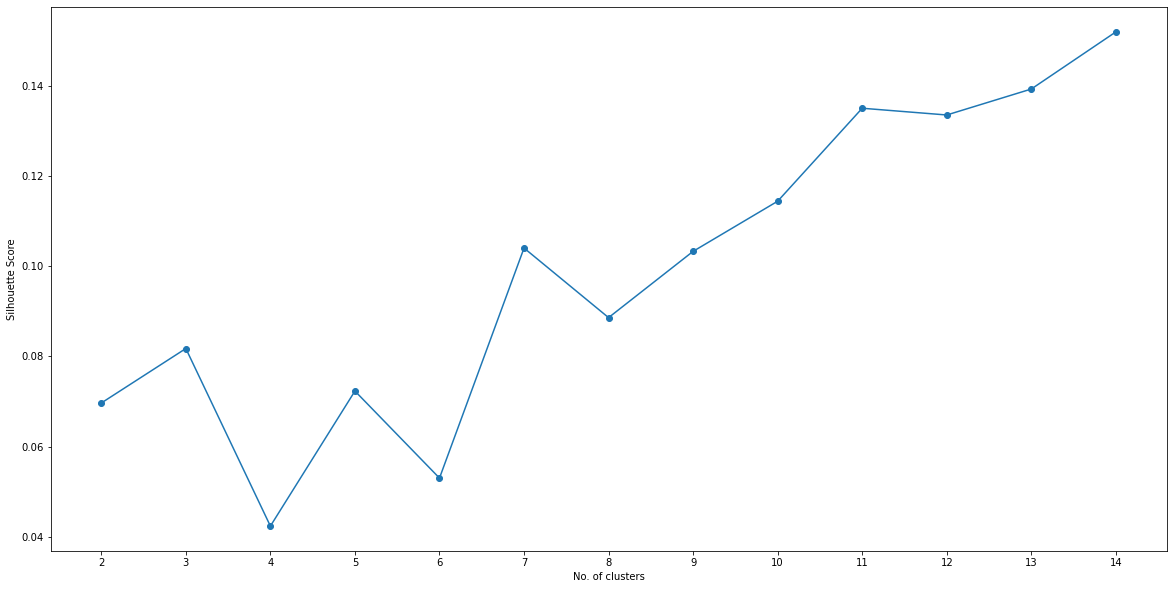

In [49]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

# From the graph the optimal number is found to be 8 using the Elbow Method.

In [50]:
opt_value = 8

# Now that we have calculated out optimum value of clusters, we can proceed with K-Means clustering.

In [51]:
buc_clusters=opt_value

# Run k-means clustering
buc_gc = buc_grouped_clustering
kmeans = KMeans(n_clusters = buc_clusters, init = 'k-means++', random_state = 0).fit(buc_gc)

In [52]:
# Add clustering labels
districts_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# Now we will crate a final version of dataframe containing all the necessary data.

In [66]:
buc_final = buc_data
buc_final = buc_final.join(districts_venues_sorted.set_index('District'),on='Districts')
buc_final.dropna(inplace = True)
buc_final['Cluster Labels'] = buc_final['Cluster Labels'].astype(int)
buc_final.head()

,Districts,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Lipscani,44.432163,26.104486,5,Pizza Place,Gym / Fitness Center,Clothing Store,Ice Cream Shop,Sporting Goods Shop,Beer Bar,Chocolate Shop,Gourmet Shop,Historic Site,Steakhouse
1,Aviației,44.481430,26.100141,0,Clothing Store,Gym / Fitness Center,Restaurant,Café,Supermarket,Dessert Shop,Coffee Shop,Middle Eastern Restaurant,Shopping Mall,Burger Joint
2,Băneasa,44.490610,26.076860,4,Restaurant,Hotel,Romanian Restaurant,Italian Restaurant,Sandwich Place,Café,Grocery Store,Nightclub,Park,Pizza Place
3,"Berceni, Bucharest",44.386200,26.128960,1,Pizza Place,Grocery Store,Farmers Market,Metro Station,Park,Gym / Fitness Center,Beer Garden,Restaurant,Falafel Restaurant,Fast Food Restaurant
4,Bucureștii Noi,44.489073,26.035983,2,Gym,Supermarket,Grocery Store,Dog Run,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Gas Station,Park


In [72]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
# Setup color scheme for different clusters
x = np.arange(buc_clusters)
ys = [i + x + (i*x)**2 for i in range(buc_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(buc_final['Latitude'], buc_final['Longitude'], buc_final['Districts'], 
                                  buc_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster + 1) + ')', parse_html=True)
    map_clusters.add_child(
        folium.features.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7))
       
map_clusters

# Now lets have a look at all eight clusters.

In [73]:
val = 1
buc_final.loc[buc_final['Cluster Labels'] == (val - 1), buc_final.columns[[0] + np.arange(4, buc_final.shape[1]).tolist()]]

,Districts,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Aviației,Clothing Store,Gym / Fitness Center,Restaurant,Café,Supermarket,Dessert Shop,Coffee Shop,Middle Eastern Restaurant,Shopping Mall,Burger Joint
7,Cotroceni,Accessories Store,Tennis Court,Bistro,Steakhouse,Casino,Music Store,Spa,Gym / Fitness Center,Grocery Store,Opera House
10,Dealul Spirii,Gym / Fitness Center,Restaurant,Lounge,Romanian Restaurant,Accessories Store,Tea Room,French Restaurant,Doner Restaurant,Salon / Barbershop,Department Store
11,Dorobanți,Café,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Wine Bar,Cheese Shop,Fruit & Vegetable Store,Asian Restaurant,Spanish Restaurant,Gastropub
13,Drumul Taberei,Supermarket,Coffee Shop,Restaurant,Romanian Restaurant,Pharmacy,Bakery,Spa,Burger Joint,Farmers Market,Gym / Fitness Center
14,"Dudești, Bucharest",Café,Bakery,Lounge,Italian Restaurant,Gym / Fitness Center,Cosmetics Shop,Lebanese Restaurant,Cupcake Shop,Seafood Restaurant,Doner Restaurant
16,Floreasca,Coffee Shop,Clothing Store,Restaurant,Gym / Fitness Center,Turkish Restaurant,Hotel,Nightclub,Gym,Shopping Mall,Burger Joint
29,Pipera,Café,Restaurant,Eastern European Restaurant,Snack Place,Gym / Fitness Center,Sandwich Place,Bakery,Supermarket,Coffee Shop,Pizza Place
30,Primăverii,Coffee Shop,Park,Italian Restaurant,Lounge,Mediterranean Restaurant,Restaurant,Dessert Shop,Spa,Garden,Steakhouse
31,Progresul,Gym / Fitness Center,Restaurant,Romanian Restaurant,Accessories Store,Gym,Supermarket,Steakhouse,Casino,Spa,Cosmetics Shop


In [74]:
val = 2
buc_final.loc[buc_final['Cluster Labels'] == (val - 1), buc_final.columns[[0] + np.arange(4, buc_final.shape[1]).tolist()]]

,Districts,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,"Berceni, Bucharest",Pizza Place,Grocery Store,Farmers Market,Metro Station,Park,Gym / Fitness Center,Beer Garden,Restaurant,Falafel Restaurant,Fast Food Restaurant
17,"Fundeni, Bucharest",Eastern European Restaurant,Restaurant,Farmers Market,Grocery Store,Hotel,Fast Food Restaurant,Auto Workshop,Spa,Plaza,Pool
27,Olteniței,Grocery Store,Pizza Place,Soccer Field,Farmers Market,Hardware Store,Eastern European Restaurant,Restaurant,Romanian Restaurant,Fast Food Restaurant,Pharmacy


In [75]:
val = 3
buc_final.loc[buc_final['Cluster Labels'] == (val - 1), buc_final.columns[[0] + np.arange(4, buc_final.shape[1]).tolist()]]

,Districts,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Bucureștii Noi,Gym,Supermarket,Grocery Store,Dog Run,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Gas Station,Park
8,Crângași,Supermarket,Pub,Gym,Café,Pizza Place,Gym / Fitness Center,Soccer Stadium,Grocery Store,Climbing Gym,Park
18,Ghencea,Bus Station,Furniture / Home Store,Bakery,Park,Italian Restaurant,Coffee Shop,Supermarket,Nightclub,Convenience Store,Burger Joint
19,Giulești,Park,Café,Bus Station,Supermarket,Climbing Gym,Convenience Store,Cupcake Shop,Grocery Store,Gym,Gym / Fitness Center
28,"Pantelimon, Bucharest",Park,Soccer Field,Burger Joint,Women's Store,Gym / Fitness Center,Electronics Store,Diner,Sandwich Place,Department Store,Cosmetics Shop
32,Rahova,Lebanese Restaurant,Park,Mobile Phone Shop,Supermarket,Middle Eastern Restaurant,Korean Restaurant,Gas Station,Gym,Grocery Store,Spa
36,Giurgiului,Gym,Bus Station,Supermarket,Fast Food Restaurant,Bagel Shop,Park,Pet Store,Betting Shop,Pharmacy,Playground


In [77]:
val = 4
buc_final.loc[buc_final['Cluster Labels'] == (val - 1), buc_final.columns[[0] + np.arange(4, buc_final.shape[1]).tolist()]]

,Districts,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,Odăi,Café,Pool,Auto Garage,Auto Workshop,Beach,Pharmacy,Opera House,Outdoor Sculpture,Outlet Mall,Palace


In [78]:
val = 5
buc_final.loc[buc_final['Cluster Labels'] == (val - 1), buc_final.columns[[0] + np.arange(4, buc_final.shape[1]).tolist()]]

,Districts,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Băneasa,Restaurant,Hotel,Romanian Restaurant,Italian Restaurant,Sandwich Place,Café,Grocery Store,Nightclub,Park,Pizza Place
6,"Colentina, Bucharest",Gym,Pizza Place,Chinese Restaurant,Coffee Shop,Middle Eastern Restaurant,Gym / Fitness Center,Supermarket,Burger Joint,Café,Restaurant
12,Dristor,Gym,Gym / Fitness Center,Supermarket,Italian Restaurant,Lebanese Restaurant,Pet Store,Chinese Restaurant,Café,Coffee Shop,Pizza Place
15,Ferentari,Burger Joint,Restaurant,Doner Restaurant,Convenience Store,Big Box Store,Gym / Fitness Center,Light Rail Station,Grocery Store,Bus Station,Outlet Mall
20,Grivița,Coffee Shop,History Museum,Dessert Shop,Middle Eastern Restaurant,Bar,Spa,Spanish Restaurant,Burger Joint,Gym,Bistro
21,Iancului,Dessert Shop,Supermarket,Lebanese Restaurant,Restaurant,Italian Restaurant,Gym,Turkish Restaurant,Pub,Park,Greek Restaurant
25,Obor,Gym,Pizza Place,Burger Joint,Middle Eastern Restaurant,Italian Restaurant,Coffee Shop,Supermarket,Café,Chinese Restaurant,Gym / Fitness Center
33,"Regie, Bucharest",Pizza Place,Gym,Restaurant,Romanian Restaurant,Coffee Shop,Nightclub,Climbing Gym,Print Shop,Casino,Spa
40,"Vitan, Bucharest",Italian Restaurant,Gym,Pizza Place,Bakery,Cosmetics Shop,Gym / Fitness Center,Lounge,Sandwich Place,Seafood Restaurant,Supermarket


In [79]:
val = 6
buc_final.loc[buc_final['Cluster Labels'] == (val - 1), buc_final.columns[[0] + np.arange(4, buc_final.shape[1]).tolist()]]

,Districts,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Lipscani,Pizza Place,Gym / Fitness Center,Clothing Store,Ice Cream Shop,Sporting Goods Shop,Beer Bar,Chocolate Shop,Gourmet Shop,Historic Site,Steakhouse
5,Centrul Civic,Coffee Shop,Pizza Place,Hotel,Theater,Ice Cream Shop,Clothing Store,Gourmet Shop,Chocolate Shop,Steakhouse,Monastery
22,Lipscani,Pizza Place,Gym / Fitness Center,Clothing Store,Ice Cream Shop,Sporting Goods Shop,Beer Bar,Chocolate Shop,Gourmet Shop,Historic Site,Steakhouse
24,Moșilor,Coffee Shop,Ice Cream Shop,Pizza Place,Hotel,Gym / Fitness Center,Rock Club,Beer Bar,Cocktail Bar,Clothing Store,Chocolate Shop
37,"Tei, Bucharest",Coffee Shop,Pizza Place,Hotel,Theater,Ice Cream Shop,Clothing Store,Gourmet Shop,Chocolate Shop,Steakhouse,Monastery


In [80]:
val = 7
buc_final.loc[buc_final['Cluster Labels'] == (val - 1), buc_final.columns[[0] + np.arange(4, buc_final.shape[1]).tolist()]]

,Districts,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
34,Tineretului,Furniture / Home Store,Burger Joint,Kids Store,Lighting Store,Hardware Store,Health & Beauty Service,Bus Station,Pool,Pedestrian Plaza,Opera House


In [81]:
val = 8
buc_final.loc[buc_final['Cluster Labels'] == (val - 1), buc_final.columns[[0] + np.arange(4, buc_final.shape[1]).tolist()]]

,Districts,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Dămăroaia,Salon / Barbershop,Gym,Bar,Bus Station,Restaurant,Supermarket,Grocery Store,Café,Gym / Fitness Center,Gastropub
23,Militari,Supermarket,Restaurant,Pizza Place,Grocery Store,Gym,Bus Station,Gym / Fitness Center,French Restaurant,Gym Pool,Garden


# After studying all eight clusters, it is recommended to the client that districts such as Obor, Colentina	and Dristor	 that fall in cluster 5 look like good locations for starting a gym. The client can go ahead and make a decision depending on other factors like availability and legal requirements that are out of scope of this project.